In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

# Problem # 1

In [159]:
data = pd.read_csv("dataset.csv")

In [160]:
data.head()

,source,target,age,connections
0,1,2,18.0,6.0
1,1,3,18.0,6.0
2,1,5,18.0,6.0
3,2,4,10.0,6.0
4,3,5,11.0,4.0


**Social Network Analysis**

In [161]:
source = data.iloc[:, 0].values
target = data.iloc[:, 1].values

In [162]:
print(source)
print(target)

[ 1  1  1  2  3  4  5  5  5  6  7  7  7  7  7  7  8  8  9 10 11 11 11 11
 12 12 12 12 12 12 12 13 14 15 16 16 16 16 16 16 17 17 17 17 18 19 20 21
 22 23 23 23 23 23 24 24 25 26 27]
[ 2  3  5  4  5  5  1  2  6  2  9 11 12 13 14  2  6  7  5  4 23 22 20  4
  9 14 15 20 21 25  4  3  2  5 21 19 18  7  8 12  1  3  6  7 10 11 12 14
 23 24 25 19 16 17  1  5  7  7 17]


In [163]:
# Create an empty graph
graph = nx.Graph()

In [164]:
for i in range(source.size):
  graph.add_edge(source[i], target[i])

In [165]:
# Drawing options
options = {
    "font_size": 10,
    "node_size": 300,
    "node_color": "white",
    "edgecolors": "blue",
    "linewidths":1,
    "width": 1,
}

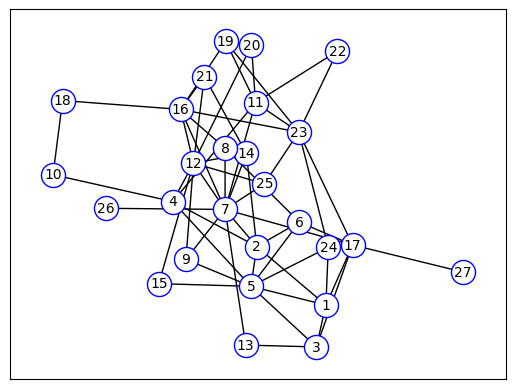

In [166]:
# Drawing with options
nx.draw_networkx(graph, **options)

**Attribute Analysis**

In [167]:
X = data.iloc[:, 2].values
y = data.iloc[:, -1].values

In [168]:
print(X)
print(y)

[18. 18. 18. 10. 11. 10. 15. 15. 15. 11. 24. 24. 24. 24. 24. 24. 12. 12.
 10. 11. 19. 19. 19. 19. 26. 26. 26. 26. 26. 26. 26. 13. 12. 10. 21. 21.
 21. 21. 21. 21. 20. 20. 20. 20. 12. 11. 13. 11. 12. 23. 23. 23. 23. 23.
 12. 12. 11. nan nan]
[ 6.  6.  6.  6.  4.  5.  9.  9.  9.  4. 10. 10. 10. 10. 10. 10.  3.  3.
  3.  2.  6.  6.  6.  6. 10. 10. 10. 10. 10. 10. 10.  2.  4.  2.  7.  7.
  7.  7.  7.  7.  5.  5.  5.  5.  2.  3.  3.  3.  2.  7.  7.  7.  7.  7.
  3.  3.  3. nan nan]


Distribution of age

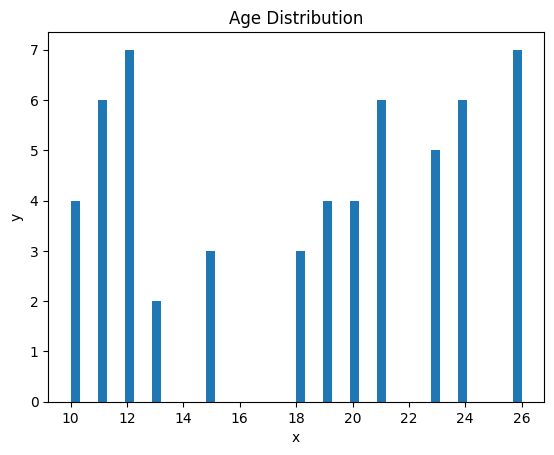

In [169]:
plt.hist(X, bins=50, range=[10,26])
plt.title("Age Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Simple Linear Regression

In [170]:
X = np.expand_dims(X, axis=0)
y = np.expand_dims(y, axis=0)

In [171]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy="mean")
X = impute.fit_transform(X)

y = impute.fit_transform(y)

In [172]:
X = X.reshape(-1,1)

In [173]:
y = y.reshape(-1,1)

In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [175]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [176]:
y_pred = lr.predict(X_test)

In [177]:
y_pred = np.squeeze(y_pred)
y_test = np.squeeze(y_test)

In [178]:
rounded_pred = y_pred.round()

In [179]:
d = {"Prediction": rounded_pred, "Actual Values": y_test}
results = pd.DataFrame(data=d)

In [180]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

**Insights**

In [181]:
results

,Prediction,Actual Values
0,7.0,7.0
1,7.0,7.0
2,7.0,5.0
3,9.0,10.0
4,9.0,10.0
5,6.0,6.0
6,3.0,2.0
7,3.0,3.0
8,7.0,6.0
9,4.0,3.0


In [182]:
print('Metrics for simple linear model:\n')
print(f'Mean Squared Error: {mse}')
print(f'r2 score: {r2}')

Metrics for simple linear model:

Mean Squared Error: 0.9245647391619775
r2 score: 0.8752227531027884


In [183]:
print(f'predicting connections for unseen age of 30: {lr.predict([[30]]).round()}')

predicting connections for unseen age of 30: [[11.]]


# Problem # 2

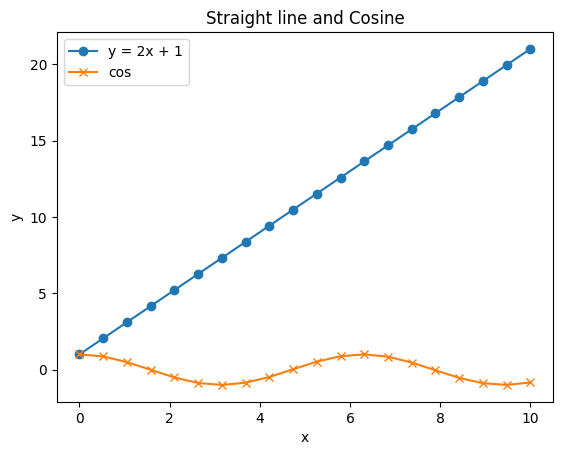

In [186]:
# Generate data for the first line
x1 = np.linspace(0, 10, 20)
y1 = 2 * x1 + 1

# Generate data for the second line
x2 = np.linspace(0, 10, 20)
y2 = np.cos(x2)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the first line with a circle marker
ax.plot(x1, y1, '-o', label='y = 2x + 1')

# Plot the second line with a diamond marker
ax.plot(x2, y2, '-x', label='cos')


# Add a legend to the plot
ax.legend()

# Set the title and labels
ax.set_title("Straight line and Cosine")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Show the plot
plt.show()